In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_csv("data.csv")
print("type(df)-->",type(df))

df.head(-10)

type(df)--> <class 'pandas.core.frame.DataFrame'>


,State,Voter Turnout,Total Ballots,Year,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Non-citizen,Prison,Probation,Parole,Total Ineligible Felon
0,United States,55.3,107390107.0,2000,194331436,210623408,7.7,1377013,2339388,536039,3082746
1,Alabama,NaN,NaN,2000,3241682,3334576,1.5,26225,40178,5484,51798
2,Alaska,68.7,287825.0,2000,419111,440296,3.4,4173,4779,525,7088
3,Arizona,46.4,1559520.0,2000,3357701,3816498,10.3,26510,59810,3474,59889
4,Arkansas,NaN,NaN,2000,1925961,2001774,2.3,11915,28409,8659,34779
...,...,...,...,...,...,...,...,...,...,...,...
609,Oklahoma*,39.6,1153284.0,2022,2913333,3080502,4.1,22071,15889,2237,40197
610,Oregon,62.3,1997689.0,2022,3208133,3409264,5.5,12753,0,0,12753
611,Pennsylvania*,54.4,5410022.0,2022,9953327,10366708,3.6,38938,0,0,38938
612,Rhode Island*,43.6,361449.0,2022,828495,890835,6.7,2227,0,0,2227


In [6]:
df = df[~df.apply(lambda row: row.astype(str).str.contains("United States", case=False)).any(axis=1)]
df.head(10)

,State,Voter Turnout,Total Ballots,Year,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Non-citizen,Prison,Probation,Parole,Total Ineligible Felon
1,Alabama,NaN,NaN,2000,3241682,3334576,1.5,26225,40178,5484,51798
2,Alaska,68.7,287825.0,2000,419111,440296,3.4,4173,4779,525,7088
3,Arizona,46.4,1559520.0,2000,3357701,3816498,10.3,26510,59810,3474,59889
4,Arkansas,NaN,NaN,2000,1925961,2001774,2.3,11915,28409,8659,34779
5,California,56.6,11142843.0,2000,19685258,24867252,18.8,163001,0,117647,280648
6,Colorado,NaN,NaN,2000,3026316,3246521,6.7,16833,0,5500,22333
7,Connecticut,62.5,1474103.0,2000,2357687,2575243,6.6,18355,47636,1868,44041
8,Delaware,NaN,NaN,2000,554863,594256,3.9,6921,20052,579,17526
9,District of Columbia,NaN,NaN,2000,416696,458301,10.2,7456,0,0,7456
10,Florida,57.5,6138765.0,2000,10667193,12475387,10.4,71319,296139,5982,225371


In [7]:
nan_counts = df.isna().sum()
print(nan_counts)

State                                0
Voter Turnout                       62
Total Ballots                       62
Year                                 0
Voting-Eligible Population (VEP)     0
Voting-Age Population (VAP)          0
 Non-citizen                         0
Prison                               0
Probation                            0
Parole                               0
Total Ineligible Felon               0
dtype: int64


In [8]:
columns_to_modify = ['Total Ballots','Voter Turnout',]

for column in columns_to_modify:
    min_value = df[column].min(skipna=True)
    df.loc[1:, column] = df.loc[1:, column].fillna(min_value)
print(df)


             State  Voter Turnout  Total Ballots  Year  \
1          Alabama           28.7       122356.0  2000   
2           Alaska           68.7       287825.0  2000   
3          Arizona           46.4      1559520.0  2000   
4         Arkansas           28.7       122356.0  2000   
5       California           56.6     11142843.0  2000   
..             ...            ...            ...   ...   
619       Virginia           47.6      3021956.0  2022   
620     Washington           55.3      3067686.0  2022   
621  West Virginia           35.4       494753.0  2022   
622     Wisconsin*           59.8      2673154.0  2022   
623        Wyoming           45.6       198198.0  2022   

     Voting-Eligible Population (VEP)  Voting-Age Population (VAP)  \
1                             3241682                      3334576   
2                              419111                       440296   
3                             3357701                      3816498   
4                      

In [9]:
df.describe()

,Voter Turnout,Total Ballots,Year,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Non-citizen,Prison,Probation,Parole,Total Ineligible Felon
count,612.000000,6.120000e+02,612.000000,6.120000e+02,6.120000e+02,612.000000,612.000000,612.000000,612.000000,612.000000
mean,51.396405,2.027956e+06,2011.000000,4.224234e+06,4.659260e+06,5.556536,24996.498366,41150.482026,9334.647059,57365.959150
std,13.161520,2.355786e+06,6.909753,4.439381e+06,5.219642e+06,3.689673,31417.447333,82086.857088,20568.198985,83716.355099
min,28.700000,1.223560e+05,2000.000000,3.610780e+05,3.666390e+05,0.600000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,4.118208e+05,2005.500000,1.195060e+06,1.263353e+06,2.600000,5822.000000,0.000000,0.000000,10932.500000
50%,52.650000,1.295784e+06,2011.000000,3.079284e+06,3.253290e+06,4.400000,17427.500000,12139.500000,2687.000000,32975.500000
75%,61.500000,2.688890e+06,2016.500000,5.075504e+06,5.537238e+06,7.900000,31545.750000,43817.000000,8633.750000,70791.250000
max,79.800000,1.778515e+07,2022.000000,2.599472e+07,3.073060e+07,18.900000,175512.000000,471067.000000,120753.000000,499362.000000


In [10]:
# Splitting the data into training and testing sets
from sklearn.preprocessing import MinMaxScaler


train_data = df[df['Year'] != 2022]  # Exclude 2022 for training
test_data = df[df['Year'] == 2022]   # Use 2022 for testing

# Scaling the target variable
scaler = MinMaxScaler()

# Features and target for training
target_column = 'Voter Turnout'
X_train = train_data.drop(columns=[target_column, 'Year', 'State'])
y_train = train_data[target_column]

# Features and target for testing
X_test = test_data.drop(columns=[target_column, 'Year', 'State'])
y_test = test_data[target_column]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check data splits
print("Training Data Shape:",X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)


Training Data Shape: (561, 8)
Testing Data Shape: (51, 8)


Linear Regression

Linear Regression: MSE = 44.2277, R2 Score = 0.1337


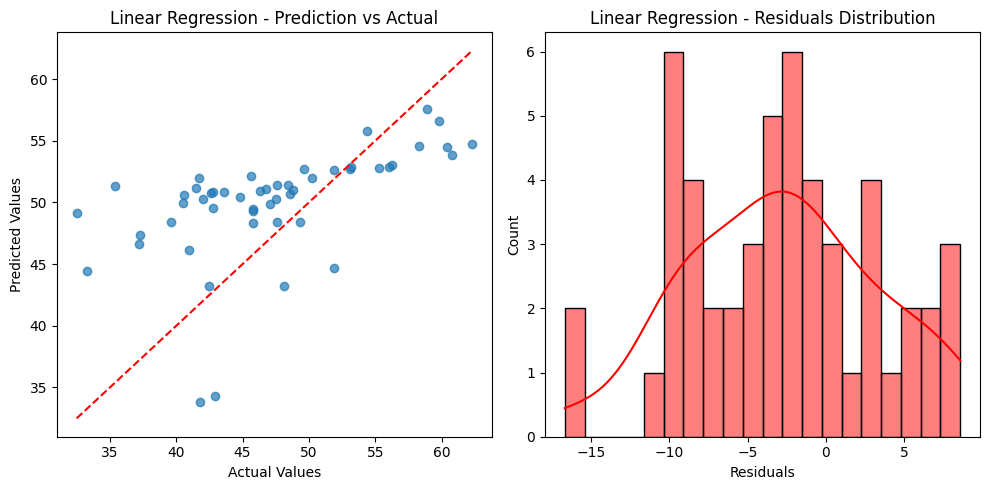

In [11]:


# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print(f"Linear Regression: MSE = {mse_lr:.4f}, R2 Score = {r2_lr:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Linear Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Linear Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()


Ridge Regression

Ridge Regression: MSE = 44.2278, R2 Score = 0.1337


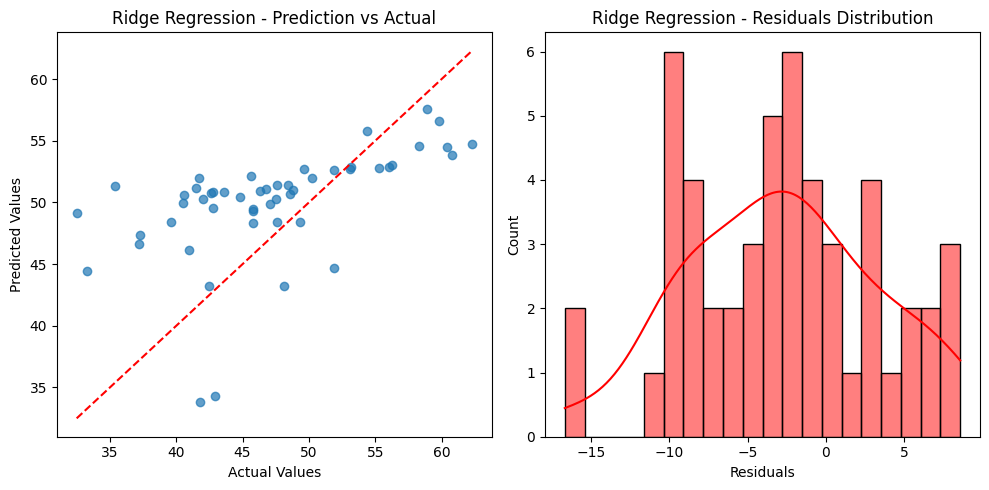

In [12]:
#Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
print(f"Ridge Regression: MSE = {mse_ridge:.4f}, R2 Score = {r2_ridge:.4f}")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Ridge Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Ridge Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

Random Forest Regression


Random Forest Regression: MSE = 45.2267, R2 Score = 0.1142


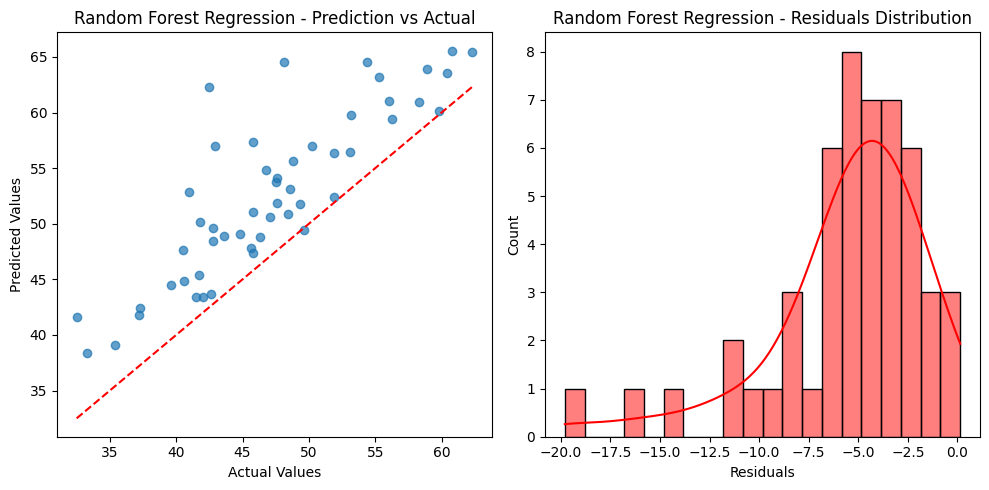

In [13]:
# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"Random Forest Regression: MSE = {mse_rf:.4f}, R2 Score = {r2_rf:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Random Forest Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Random Forest Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

Decision Tree Regression


Decision Tree Regression: MSE = 75.4731, R2 Score = -0.4783


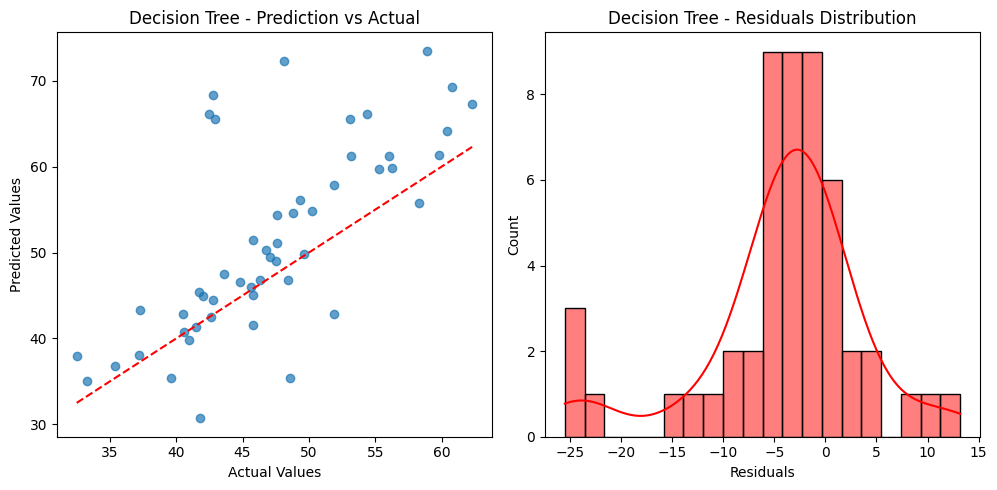

In [14]:
# Decision Tree Regression
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

# Metrics
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print(f"Decision Tree Regression: MSE = {mse_dt:.4f}, R2 Score = {r2_dt:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Decision Tree - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Decision Tree - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

Lasso Regression

/usr/local/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.730e+04, tolerance: 1.023e+01
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: MSE = 44.2396, R2 Score = 0.1335


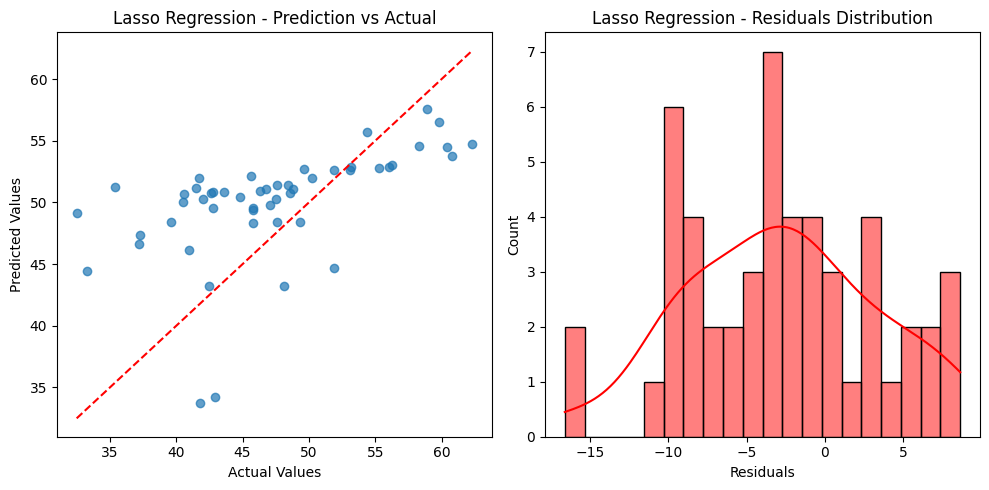

In [15]:
# Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)

# Metrics
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
print(f"Lasso Regression: MSE = {mse_lasso:.4f}, R2 Score = {r2_lasso:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Lasso Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Lasso Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()


### Feature Engineering

In [16]:
#feature addition

df['Ballot to Eligible Ratio'] = df['Total Ballots'] / df['Voting-Eligible Population (VEP)']
df.head()

,State,Voter Turnout,Total Ballots,Year,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Ballot to Eligible Ratio
1,Alabama,28.7,122356.0,2000,3241682,3334576,1.5,26225,40178,5484,51798,0.037745
2,Alaska,68.7,287825.0,2000,419111,440296,3.4,4173,4779,525,7088,0.686751
3,Arizona,46.4,1559520.0,2000,3357701,3816498,10.3,26510,59810,3474,59889,0.464461
4,Arkansas,28.7,122356.0,2000,1925961,2001774,2.3,11915,28409,8659,34779,0.063530
5,California,56.6,11142843.0,2000,19685258,24867252,18.8,163001,0,117647,280648,0.566050


In [17]:
train_data = df[df['Year'] != 2022]  # Exclude 2022 for training
test_data = df[df['Year'] == 2022]   # Use 2022 for testing

# Scaling the target variable
scaler = MinMaxScaler()

# Features and target for training
target_column = 'Voter Turnout'
X_train = train_data.drop(columns=[target_column, 'Year', 'State'])
y_train = train_data[target_column]

# Features and target for testing
X_test = test_data.drop(columns=[target_column, 'Year', 'State'])
y_test = test_data[target_column]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check data splits
print("Training Data Shape:",X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (561, 9)
Testing Data Shape: (51, 9)


In [18]:
results = []
mse_values = []
r2_values = []

Linear Regression: MSE = 14.3456, R2 Score = 0.7190


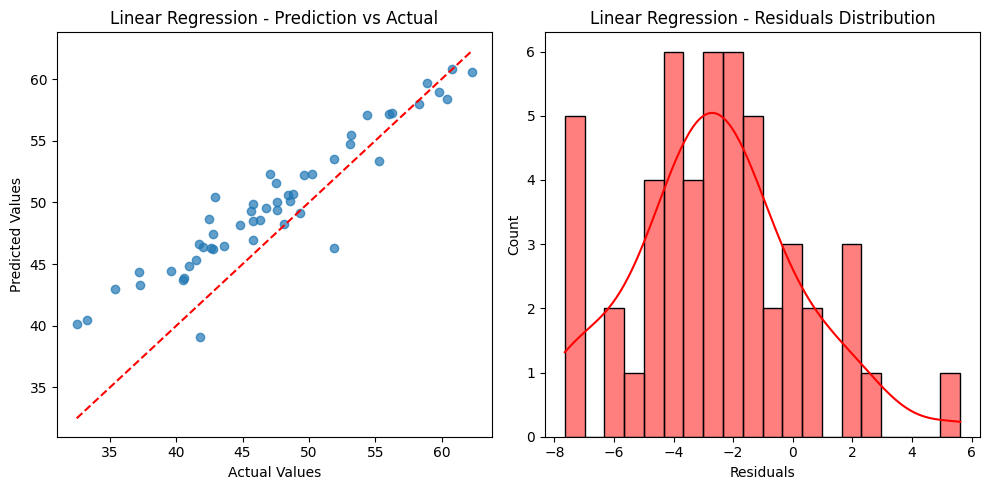

In [19]:


# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print(f"Linear Regression: MSE = {mse_lr:.4f}, R2 Score = {r2_lr:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Linear Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Linear Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Linear Regression")
r2_values.append(r2_lr)
mse_values.append(mse_lr)


Ridge Regression: MSE = 15.6229, R2 Score = 0.6940


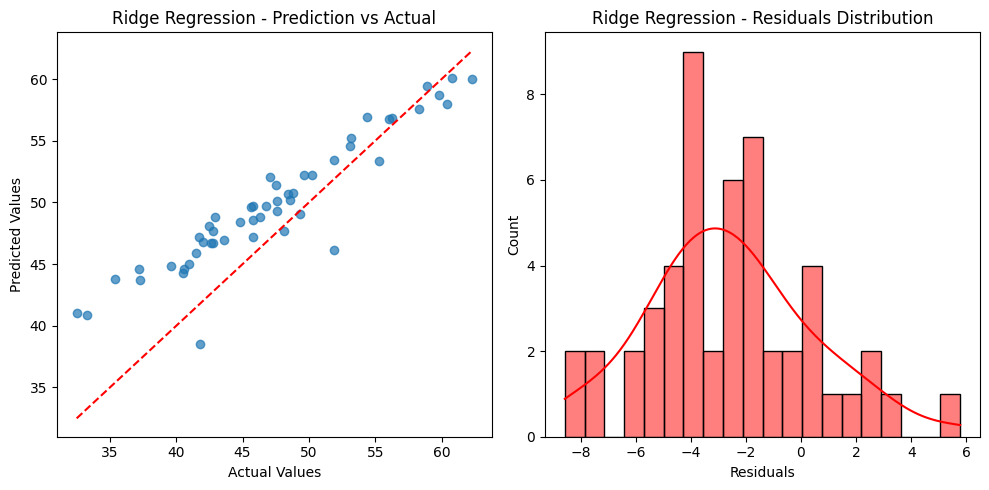

In [20]:
#Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
print(f"Ridge Regression: MSE = {mse_ridge:.4f}, R2 Score = {r2_ridge:.4f}")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Ridge Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Ridge Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Ridge Regression")
r2_values.append(r2_ridge)
mse_values.append(mse_ridge)

Random Forest Regression: MSE = 0.0075, R2 Score = 0.9999


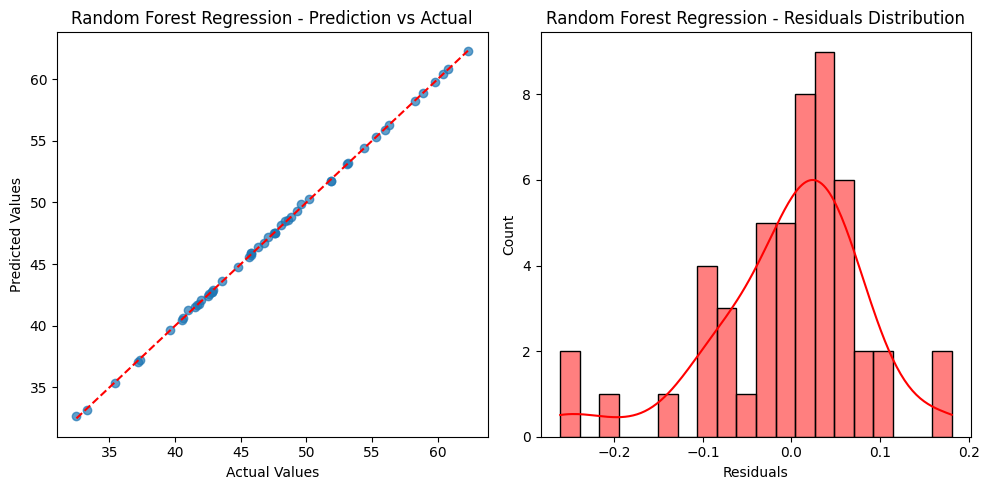

In [21]:
# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"Random Forest Regression: MSE = {mse_rf:.4f}, R2 Score = {r2_rf:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Random Forest Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Random Forest Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Random Forest Regression")
r2_values.append(r2_rf)
mse_values.append(mse_rf)

Decision Tree Regression: MSE = 0.0437, R2 Score = 0.9991


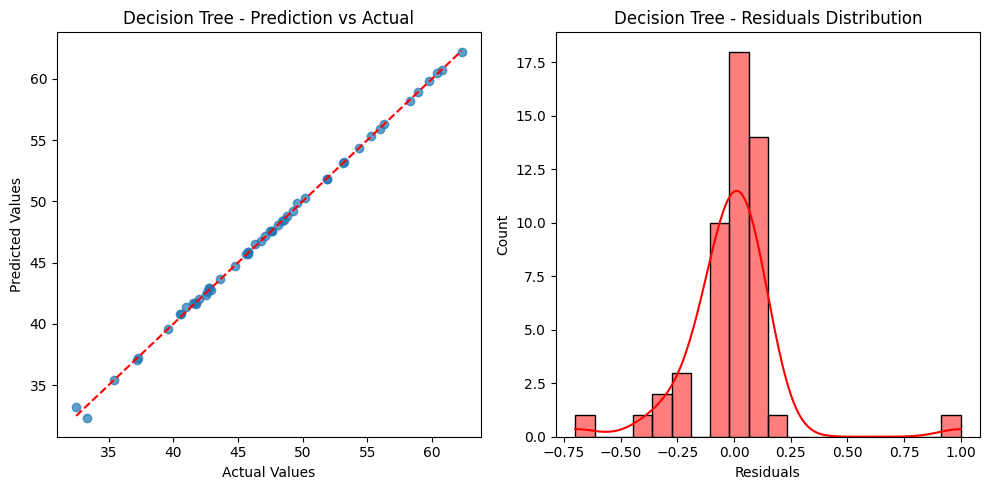

In [22]:
# Decision Tree Regression
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

# Metrics
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print(f"Decision Tree Regression: MSE = {mse_dt:.4f}, R2 Score = {r2_dt:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Decision Tree - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Decision Tree - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Decision Tree Regression")
r2_values.append(r2_dt)
mse_values.append(mse_dt)

/usr/local/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.468e+03, tolerance: 1.023e+01
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: MSE = 15.3679, R2 Score = 0.6990


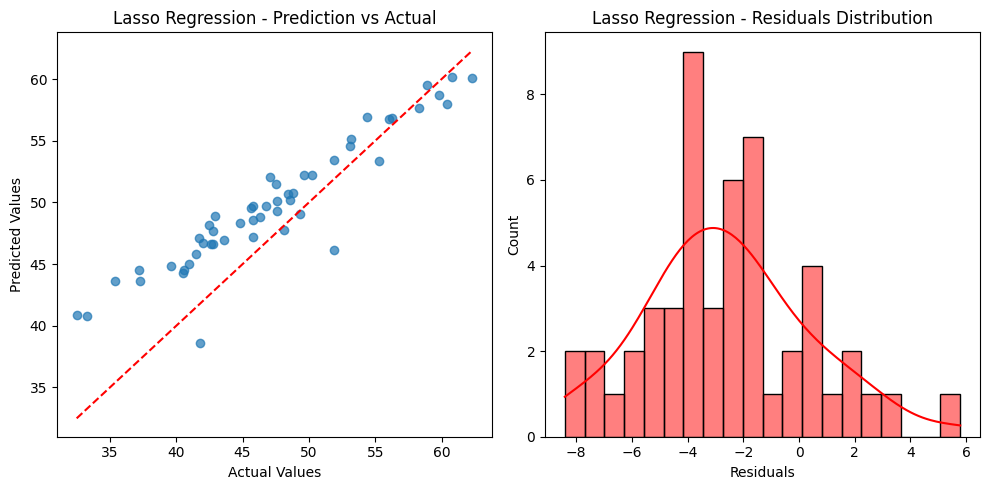

In [23]:
# Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)

# Metrics
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
print(f"Lasso Regression: MSE = {mse_lasso:.4f}, R2 Score = {r2_lasso:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Lasso Regression - Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title('Lasso Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()
results.append("Lasso Regression")
r2_values.append(r2_lasso)
mse_values.append(mse_lasso)

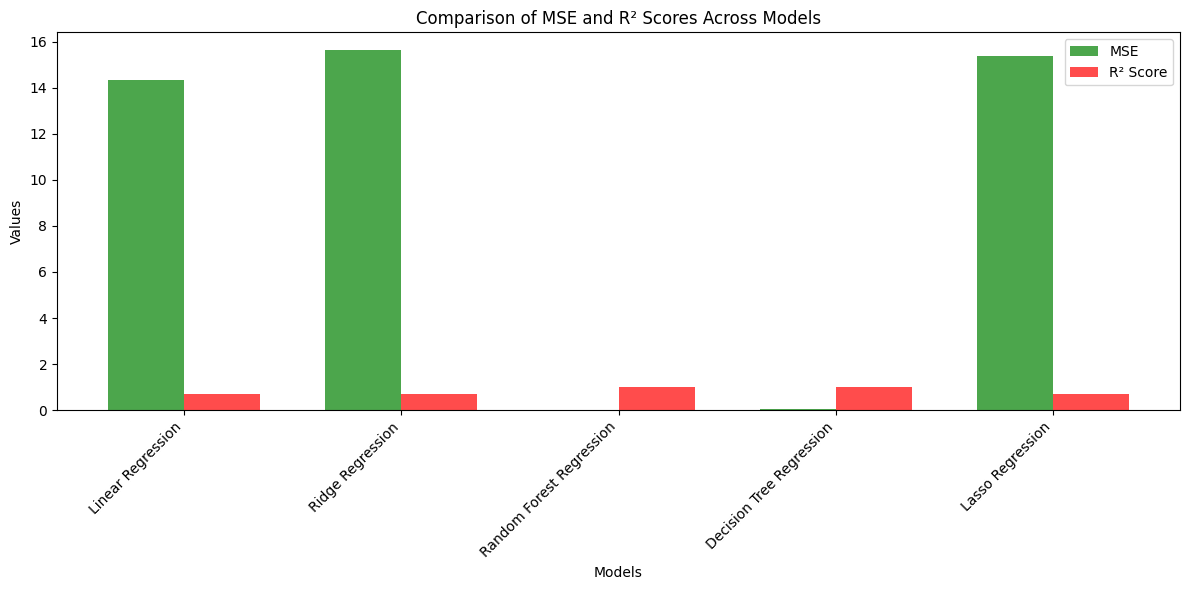

In [28]:

# Ensure that results, mse_values, and r2_values have matching lengths
assert len(results) == len(mse_values) == len(r2_values), "Mismatch in the lengths of results, mse_values, and r2_values"

# Plot comparison of R² and MSE values
x = np.arange(len(results))  # Positions for the bars
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))

# MSE bar plot
plt.bar(x - width/2, mse_values, width, label='MSE', color='green', alpha=0.7)

# R² bar plot
plt.bar(x + width/2, r2_values, width, label='R² Score', color='red', alpha=0.7)

# Add labels and title
plt.xticks(x, results, rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of MSE and R² Scores Across Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
